In [3]:
import os
import cv2
import numpy as np
import sys
from ultralytics import YOLO
import torch
import torchvision.transforms as transforms
import shutil
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import supervision as sv
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [1]:
!pip install ultralytics --upgrade
!pip install supervision
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gm9laVVmpThNSgEGjUZx")
project = rf.workspace("iksan-wijaya").project("plat-detection-3-experimental")
version = project.version(3)
dataset = version.download("yolov8-obb")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to plat-detection-3-(experimental)-3 in yolov8-obb:: 100%|██████████| 7982/7982 [00:01<00:00, 5435.26it/s]


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
base_dir = "/content/plat-detection-3-(experimental)-3"

train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")
test_dir = os.path.join(base_dir, "test")

In [5]:
image_size = (640, 640)

In [6]:
# Load the YOLOv8 model
model = YOLO('yolov8n-obb.pt')

# Train the model
model.train(data=os.path.join(base_dir, "data.yaml"), epochs=50, imgsz=640)

100%|██████████| 6.26M/6.26M [00:00<00:00, 263MB/s]

Ultralytics 8.3.19 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


engine/trainer: task=obb, mode=train, model=yolov8n-obb.pt, data=/content/plat-detection-3-(experimental)-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False

100%|██████████| 755k/755k [00:00<00:00, 22.0MB/s]


Overriding model.yaml nc=15 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 301MB/s]


AMP: checks passed ✅


train: Scanning /content/plat-detection-3-(experimental)-3/train/labels... 3339 images, 24 backgrounds, 257 corrupt: 100%|██████████| 3339/3339 [00:02<00:00, 1115.73it/s]

train: WARNING ⚠️ /content/plat-detection-3-(experimental)-3/train/images/1-E-3977-QM-09-19_jpg.rf.0e0eb04bbaac97f1ef2845dc4e00e609.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0352]
train: WARNING ⚠️ /content/plat-detection-3-(experimental)-3/train/images/1-E-3977-QM-09-19_jpg.rf.75ff357a80745f83ab10fc471042fee2.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0328]
train: WARNING ⚠️ /content/plat-detection-3-(experimental)-3/train/images/1-E-3977-QM-09-19_jpg.rf.d6e2031b6486bc204a765a056508a539.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0153]
train: WARNING ⚠️ /content/plat-detection-3-(experimental)-3/train/images/101-E-4604-PS-09-17_jpg.rf.38af8a9dd38be1f8ec8d3e63fba22cf4.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0672]
train: WARNING ⚠️ /content/plat-detection-3-(experimental)-3/train/images/101-E-4604-PS-09-17_jpg.

train: New cache created: /content/plat-detection-3-(experimental)-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/plat-detection-3-(experimental)-3/valid/labels... 488 images, 1 backgrounds, 54 corrupt: 100%|██████████| 488/488 [00:00<00:00, 843.33it/s]

val: WARNING ⚠️ /content/plat-detection-3-(experimental)-3/valid/images/106-E-4670-TL-05-22_jpg.rf.767f95258abd3a7ad3cf3198171bca5c.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0139]
val: WARNING ⚠️ /content/plat-detection-3-(experimental)-3/valid/images/111-E-6810-IX-05-20_jpg.rf.70a1e83f186131251d45f0cf034cb61a.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [       1.02]
val: WARNING ⚠️ /content/plat-detection-3-(experimental)-3/valid/images/111-E-6810-IX_jpg.rf.8e4c33c1feccdfd66597c59227bc8d0b.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0187]
val: WARNING ⚠️ /content/plat-detection-3-(experimental)-3/valid/images/113-E-2283-RG_jpg.rf.cb4af0495b37981df2d877c2c448e7f5.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0479]
val: WARNING ⚠️ /content/plat-detection-3-(experimental)-3/valid/images/115-E-5305-SM-06-20_jpg.rf.7fe05ff1e17b3

val: New cache created: /content/plat-detection-3-(experimental)-3/valid/labels.cache
Plotting labels to runs/obb/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/obb/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.56G      1.352      1.473      2.911         27        640: 100%|██████████| 193/193 [01:16<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  5.98it/s]


                   all        434        467      0.931      0.919      0.954      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.17G      1.087     0.8489      2.652         27        640: 100%|██████████| 193/193 [01:10<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.00it/s]

                   all        434        467      0.844      0.867      0.922      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.18G      1.056     0.7943      2.604         34        640: 100%|██████████| 193/193 [01:10<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  5.85it/s]

                   all        434        467      0.814      0.931      0.937      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.18G      1.001     0.7502      2.575         23        640: 100%|██████████| 193/193 [01:09<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  5.19it/s]

                   all        434        467      0.912      0.983      0.967      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.19G     0.9519     0.7231      2.502         29        640: 100%|██████████| 193/193 [01:12<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.00it/s]

                   all        434        467      0.773      0.878      0.909      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.17G     0.9257     0.6922      2.487         25        640: 100%|██████████| 193/193 [01:09<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  5.38it/s]

                   all        434        467      0.825      0.845      0.916      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.18G     0.9065     0.6597      2.464         25        640: 100%|██████████| 193/193 [01:10<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  5.00it/s]

                   all        434        467      0.883      0.972       0.96      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.18G      0.894     0.6501      2.425         25        640: 100%|██████████| 193/193 [01:09<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.88it/s]

                   all        434        467      0.882      0.929      0.966      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.18G     0.8686     0.6323      2.404         26        640: 100%|██████████| 193/193 [01:13<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  5.69it/s]

                   all        434        467      0.915      0.955      0.975      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.17G     0.8666      0.629      2.381         21        640: 100%|██████████| 193/193 [01:10<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.05it/s]

                   all        434        467      0.937       0.96      0.978      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.18G     0.8399     0.6008      2.376         26        640: 100%|██████████| 193/193 [01:11<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  5.06it/s]

                   all        434        467      0.849      0.925      0.947      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.18G     0.8349     0.5957      2.359         27        640: 100%|██████████| 193/193 [01:08<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  5.48it/s]

                   all        434        467       0.95      0.975      0.978      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.2G     0.8386     0.5924      2.347         24        640: 100%|██████████| 193/193 [01:10<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  5.93it/s]

                   all        434        467      0.944      0.976      0.979      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.17G     0.8424     0.6023      2.354         25        640: 100%|██████████| 193/193 [01:08<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.02it/s]

                   all        434        467      0.902      0.946      0.969      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.18G     0.8377     0.5786      2.341         24        640: 100%|██████████| 193/193 [01:09<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  5.87it/s]

                   all        434        467      0.886      0.966      0.965      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.18G     0.8071     0.5637      2.294         26        640: 100%|██████████| 193/193 [01:08<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.08it/s]

                   all        434        467      0.908      0.927      0.964       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.18G     0.8116     0.5631       2.32         30        640: 100%|██████████| 193/193 [01:12<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.08it/s]

                   all        434        467      0.936      0.972      0.981      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.17G     0.7927     0.5571      2.302         22        640: 100%|██████████| 193/193 [01:08<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.14it/s]

                   all        434        467      0.907      0.927      0.965      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.18G     0.7838     0.5453      2.299         27        640: 100%|██████████| 193/193 [01:09<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.01it/s]

                   all        434        467      0.956      0.971      0.986      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.18G     0.7817     0.5357      2.312         25        640: 100%|██████████| 193/193 [01:09<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  5.48it/s]

                   all        434        467      0.934      0.857       0.96      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.18G     0.7783     0.5339      2.299         27        640: 100%|██████████| 193/193 [01:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.94it/s]

                   all        434        467      0.933      0.962      0.982      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.17G     0.7773     0.5359      2.279         31        640: 100%|██████████| 193/193 [01:10<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.38it/s]

                   all        434        467       0.92       0.94      0.978      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.18G      0.764     0.5215      2.266         25        640: 100%|██████████| 193/193 [01:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.06it/s]

                   all        434        467       0.96      0.985      0.985      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.18G     0.7442     0.5113      2.256         25        640: 100%|██████████| 193/193 [01:04<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.81it/s]

                   all        434        467      0.963      0.985      0.987       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.18G     0.7595     0.5117      2.258         24        640: 100%|██████████| 193/193 [01:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.23it/s]

                   all        434        467      0.958      0.976      0.987      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.17G     0.7513     0.5139      2.265         29        640: 100%|██████████| 193/193 [01:09<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  5.30it/s]

                   all        434        467      0.968      0.987      0.989      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.18G     0.7586     0.5163       2.25         29        640: 100%|██████████| 193/193 [01:08<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  5.93it/s]

                   all        434        467      0.958      0.975      0.988      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.18G     0.7332     0.5108      2.216         30        640: 100%|██████████| 193/193 [01:06<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.23it/s]

                   all        434        467      0.961      0.983      0.989      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.18G     0.7403     0.5032      2.225         27        640: 100%|██████████| 193/193 [01:06<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.05it/s]

                   all        434        467      0.971      0.983      0.987      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.17G     0.7319     0.4956      2.224         23        640: 100%|██████████| 193/193 [01:08<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.18it/s]

                   all        434        467      0.931      0.983      0.984      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.18G     0.7255     0.4907      2.245         21        640: 100%|██████████| 193/193 [01:03<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.98it/s]

                   all        434        467      0.974      0.974      0.991      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.18G      0.714     0.4904      2.199         30        640: 100%|██████████| 193/193 [01:03<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.01it/s]

                   all        434        467      0.947      0.952      0.983      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.18G     0.7055     0.4785      2.205         29        640: 100%|██████████| 193/193 [01:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.38it/s]

                   all        434        467      0.955      0.958      0.985      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.17G     0.7066     0.4772      2.192         32        640: 100%|██████████| 193/193 [01:04<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  4.99it/s]

                   all        434        467      0.894      0.961      0.974      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.18G     0.7105     0.4811      2.199         27        640: 100%|██████████| 193/193 [01:10<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.99it/s]

                   all        434        467      0.967      0.985       0.99      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.18G     0.7022     0.4784      2.193         20        640: 100%|██████████| 193/193 [01:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.59it/s]

                   all        434        467      0.972      0.971      0.991      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.18G     0.7016     0.4759      2.189         24        640: 100%|██████████| 193/193 [01:07<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  5.54it/s]

                   all        434        467      0.958      0.983      0.987      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.17G     0.6965     0.4745      2.193         35        640: 100%|██████████| 193/193 [01:09<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  5.99it/s]

                   all        434        467       0.98      0.979       0.99      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.18G     0.6803     0.4606      2.178         20        640: 100%|██████████| 193/193 [01:12<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.61it/s]

                   all        434        467      0.967      0.987      0.991      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.18G     0.6897     0.4718      2.181         23        640: 100%|██████████| 193/193 [01:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.37it/s]

                   all        434        467      0.975      0.983       0.99      0.824


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.46G     0.6588     0.4523       1.91         15        640: 100%|██████████| 193/193 [01:03<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  5.63it/s]

                   all        434        467      0.979      0.987      0.993      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.17G     0.6512     0.4267      1.918          9        640: 100%|██████████| 193/193 [01:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.25it/s]

                   all        434        467      0.981      0.985      0.991      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.18G     0.6359     0.4151       1.89         10        640: 100%|██████████| 193/193 [01:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:07<00:00,  3.88it/s]

                   all        434        467      0.975      0.985      0.991      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.18G     0.6209     0.4123      1.885          8        640: 100%|██████████| 193/193 [01:03<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.28it/s]

                   all        434        467      0.978      0.987      0.992      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.18G     0.6139     0.4036      1.868          7        640: 100%|██████████| 193/193 [01:03<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.11it/s]

                   all        434        467       0.98      0.987      0.993      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.17G     0.5982     0.3874      1.863          9        640: 100%|██████████| 193/193 [01:00<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.15it/s]

                   all        434        467      0.979      0.983      0.991      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.18G     0.5882     0.3824      1.864          9        640: 100%|██████████| 193/193 [01:01<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  6.19it/s]

                   all        434        467      0.979      0.986      0.993      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.19G     0.5905     0.3817      1.832         13        640: 100%|██████████| 193/193 [01:03<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.50it/s]

                   all        434        467       0.98      0.985      0.992      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.18G     0.5654     0.3649      1.827          7        640: 100%|██████████| 193/193 [01:02<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.47it/s]

                   all        434        467      0.987      0.982      0.993      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.17G      0.569     0.3715      1.825          7        640: 100%|██████████| 193/193 [01:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:04<00:00,  5.81it/s]

                   all        434        467      0.981      0.983      0.993      0.872



50 epochs completed in 1.028 hours.
Optimizer stripped from runs/obb/train/weights/last.pt, 6.4MB
Optimizer stripped from runs/obb/train/weights/best.pt, 6.4MB

Validating runs/obb/train/weights/best.pt...
Ultralytics 8.3.19 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-obb summary (fused): 187 layers, 3,077,414 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.26it/s]


                   all        434        467      0.987      0.982      0.993       0.88
Speed: 0.3ms preprocess, 3.2ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to runs/obb/train


lr/pg0,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
metrics/mAP50(B),▅▂▃▆▁▅▆▆▇▄▇▆▆▆▇▅▇▇▇▇██▇▇█▇▆█████████████
metrics/mAP50-95(B),▁▂▂▃▄▅▅▆▄▆▆▆▆▆▆▅▇▅▇▇▇▇▇▆▇▇▆▆▇▇▇▇▇█▇█████
metrics/precision(B),▆▃▂▆▁▅▆▆▃▇▅▅▅▆▅▆▆▆▇▇▇▇▇▇▆▇▇▅▇██▇████████
metrics/recall(B),▄▂▅█▂▇▅▆▇▅▇▆▅▇▅▁▇▅███▇███▆▆▇█▇██████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁


ultralytics.utils.metrics.OBBMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cee2527c340>
curves: []
curves_results: []
fitness: 0.8909558401762344
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.87965])
names: {0: 'plat'}
plot: True
results_dict: {'metrics/precision(B)': 0.987084105796564, 'metrics/recall(B)': 0.9818938853200095, 'metrics/mAP50(B)': 0.9926793588222204, 'metrics/mAP50-95(B)': 0.879653226993347, 'fitness': 0.8909558401762344}
save_dir: PosixPath('runs/obb/train')
speed: {'preprocess': 0.34380178847071213, 'inference': 3.2318978815034787, 'loss': 0.0010591498168382777, 'postprocess': 6.251175282737626}

In [7]:
model_best = YOLO('/content/runs/obb/train/weights/best.pt')

In [8]:
images_dir = os.path.join(test_dir, "images")
labels_dir = os.path.join(test_dir, "labels")

# Load the OBB YOLOv8 model
model = YOLO('/content/runs/obb/train/weights/best.pt')  # Path to your trained OBB model

# Initialize lists to store true and predicted labels
y_true = []  # This will hold 1 (plat present) or 0 (no plat)
y_pred = []  # This will hold 1 (detected plat) or 0 (no plat detected)

# Define class for plat
plat_class_id = 0  # Assuming class 0 corresponds to 'plat'

# Process each image in the test set
for img_name in os.listdir(images_dir):
    if img_name.endswith(('.jpg', '.png', '.jpeg')):  # Filter for image files
        img_path = os.path.join(images_dir, img_name)

        # Load image
        image = cv2.imread(img_path)

        # Run inference
        results = model(img_path)

        # Extract detections from the model results
        detections = sv.Detections.from_ultralytics(results[0])

        # Check if 'plat' was detected in the image
        detected_plat = any(detection_class == plat_class_id for detection_class in detections.class_id)

        # Load the true labels from the labels directory
        label_path = os.path.join(labels_dir, img_name.replace('.jpg', '.txt').replace('.png', '.txt'))

        # Assume 'plat' is present if the label file exists and contains 'plat'
        if os.path.exists(label_path):
            true_labels = np.loadtxt(label_path, dtype=int, usecols=(0))  # Assuming class labels are in the first column
            if true_labels.ndim == 0:  # Single label case
                true_plat_present = (true_labels == plat_class_id)  # Check if it's a 'plat'
            else:
                true_plat_present = any(true_label == plat_class_id for true_label in true_labels)  # Check for 'plat'
        else:
            true_plat_present = False  # No label file means no plat in the image

        # Add true and predicted values
        y_true.append(1 if true_plat_present else 0)
        y_pred.append(1 if detected_plat else 0)

        # Print the detection status
        if detected_plat:
            print(f"Detected 'plat' in {img_name}.")
        else:
            print(f"No 'plat' detected in {img_name}.")


image 1/1 /content/plat-detection-3-(experimental)-3/test/images/20211122_114210_jpg.rf.c2ffdd6a55d0fde5855a4bf8b506a1ea.jpg: 640x640 28.4ms
Speed: 2.2ms preprocess, 28.4ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)
Detected 'plat' in 20211122_114210_jpg.rf.c2ffdd6a55d0fde5855a4bf8b506a1ea.jpg.

image 1/1 /content/plat-detection-3-(experimental)-3/test/images/images39_jpg.rf.4cb06ab1724933b67f4b76b836e362cd.jpg: 640x640 9.8ms
Speed: 3.3ms preprocess, 9.8ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)
Detected 'plat' in images39_jpg.rf.4cb06ab1724933b67f4b76b836e362cd.jpg.

image 1/1 /content/plat-detection-3-(experimental)-3/test/images/65-E-4235-PAL_jpg.rf.cd59a35ae6ced98f4adeac54345a60d7.jpg: 640x640 14.1ms
Speed: 2.4ms preprocess, 14.1ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)
Detected 'plat' in 65-E-4235-PAL_jpg.rf.cd59a35ae6ced98f4adeac54345a60d7.jpg.

image 1/1 /content/plat-detection-3-(experimental)-3/test/imag

In [9]:
%matplotlib inline

Accuracy: 0.94
Precision: 1.00
Recall: 0.94
F1-Score: 0.97


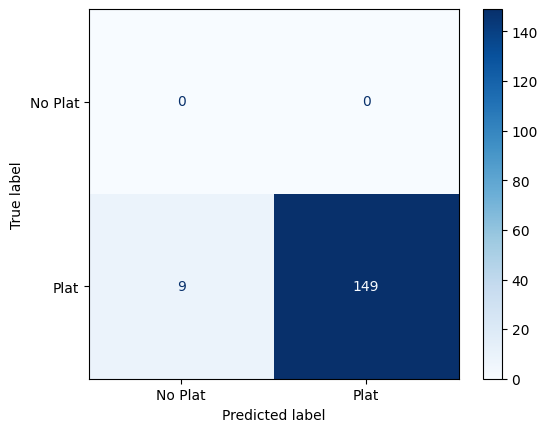

In [10]:
if y_true and y_pred:  # Ensure we have true and predicted values to compare
    # Calculate metrics (Accuracy, Precision, Recall, F1-Score)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Display the results
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

    # Display the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Plat', 'Plat'])
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import shutil

shutil.copytree('/content/runs', '/content/drive/MyDrive/runs')

'/content/drive/MyDrive/runs'